# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Read Data

In [10]:
df=pd.read_csv("c:/Users/malin/Desktop/lr.csv")
df.drop(df.index[0])
df.head(10)

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


# Seperate Features and Class 

In [11]:
row, col = df.shape

X = df.iloc[:, 0:col - 1].values
y = df.iloc[:, col - 1].values
X = pd.DataFrame(data= X)

# Standarize the Data

In [12]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split Data Into Training and Testing Data

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Logistic Regression

In [14]:
LR = LogisticRegression(random_state=5, solver='liblinear', multi_class='ovr',max_iter=5000).fit(x_train, y_train)
LR_y_pred = LR.predict(x_test)

# Accuracy

In [15]:
accuracy = LR.score(x_test, y_test)
print(accuracy)
cm = confusion_matrix(y_test, LR_y_pred)

0.7662337662337663


# Confusion Matrix

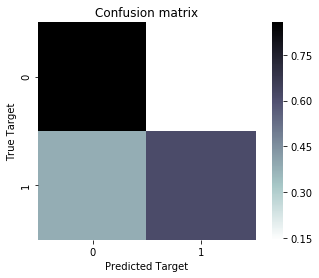

In [16]:
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cm_normalized, cmap="bone_r")
ax.set_aspect(1)
plt.title("Confusion matrix")
plt.ylabel("True Target")
plt.xlabel("Predicted Target")
plt.show()